In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1.1 下采样和上采样

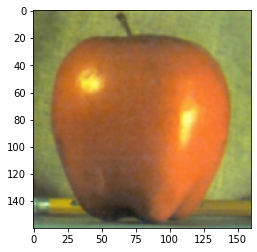

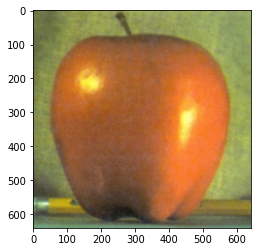

In [6]:
img = cv.imread('pic/apple.jpg')

img_down = cv.pyrDown(img)
img_up = cv.pyrUp(img)

show(img_down)
show(img_up)

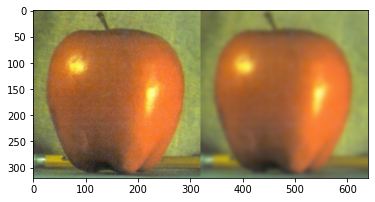

In [7]:
img_down_down = cv.pyrDown(cv.pyrDown(img))
img_up_up = cv.pyrUp(cv.pyrUp(img_down_down))

show(np.hstack([img, img_up_up]))

## 3. Laplacian金字塔

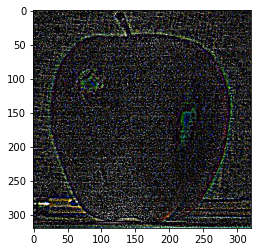

In [19]:
S0 = cv.imread('pic/apple.jpg')

S1 = cv.pyrDown(S0)
S2 = cv.pyrDown(S1)

L0 = cv.subtract(S0, cv.pyrUp(S1))

show((L0.astype(np.int) * 20).clip(0, 255).astype(np.uint8))

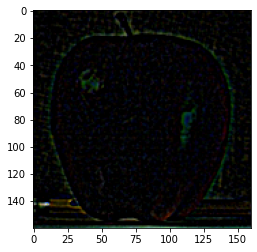

In [21]:
L1 = cv.subtract(S1, cv.pyrUp(S2))

show(L1 * 5)

## 4. 图像融合

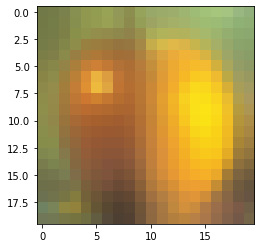

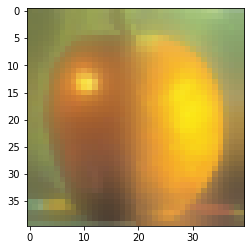

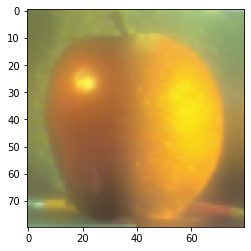

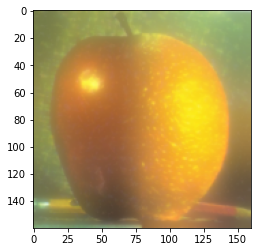

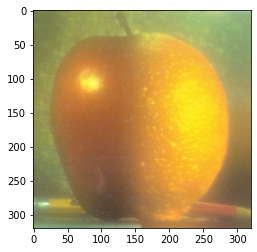

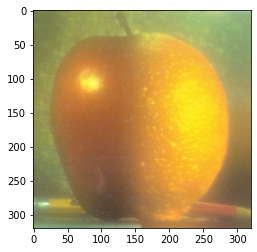

In [12]:
import numpy as np
import cv2 as cv

apple = cv.imread('pic/apple.jpg')
orange = cv.imread('pic/orange.jpg')

A = [apple] # 320, 320
B = [orange]
LA, LB, L = [], [], []

n = 5

for i in range(1, n+1):
    A.append(cv.pyrDown(A[-1]))
    B.append(cv.pyrDown(B[-1]))

for i in range(n):
    LA.append(cv.subtract(A[i], cv.pyrUp(A[i+1])))
    LB.append(cv.subtract(B[i], cv.pyrUp(B[i+1])))
LA.append(A[n])
LB.append(B[n])
    
for la, lb in zip(LA, LB):
    h, w, c = la.shape
    L.append(np.hstack([la[:, :w//2], lb[:, w//2:]]))
    
B = L[n]
for i in range(n, 0, -1):
    B = cv.add(cv.pyrUp(B), L[i-1])
    show(B)
    
show(B)